In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Carregando DataFrame

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exercícios de Estatística/house_price_com_categoria.csv')

In [ ]:
df

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,Categoria
0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,barata
1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,barata
2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,cara
3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,barata
4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,cara
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,barata
1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,barata
1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,cara
1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,barata


In [ ]:
# Média, moda e mediana da variável 'SalePrice'

print(f'Média: R${np.around(df.SalePrice.mean(), decimals=2)}')
print(f'Moda: {np.around(df.SalePrice.mode(dropna=True), decimals=2)}')
print(f'Mediana: R${np.around(df.SalePrice.median(), decimals=2)}')


Média: R$180921.2
Moda: 0    140000
Name: SalePrice, dtype: int64
Mediana: R$163000.0


In [ ]:
# Dispersão

print(f'Standard Deviation: {np.around(df.SalePrice.std(), decimals=2)}')
print(f'Skew: {np.around(df.SalePrice.skew(), decimals=2)}')
print(f'Coeficiente de Variação: {np.around(df.SalePrice.std() / df.SalePrice.mean(), decimals=2)}')

Standard Deviation: 79442.5
Skew: 1.88
Coeficiente de Variação: 0.44


<Axes: xlabel='SalePrice'>

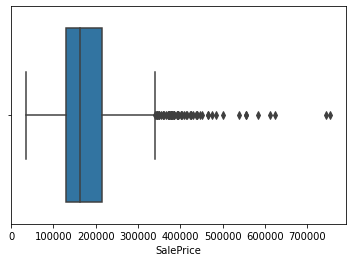

In [ ]:
# Verificação de outliers com boxplot

sns.boxplot(data=df, x='SalePrice')

In [ ]:
# Describe para verificar outliers

df.describe()

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


In [ ]:
# Verificação dos valores acima de 95% quantile

quantile = df['SalePrice'].quantile(0.95)
maiores_val = df[df['SalePrice'] >= quantile].sort_values(by='SalePrice', ascending=False)
maiores_val['SalePrice'].head(20)

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
1243    465000
591     451950
527     446261
473     440000
58      438780
349     437154
496     430000
389     426000
Name: SalePrice, dtype: int64

In [ ]:
# Criação de categoria_preco

# df['categoria_preco'] = ['Cara' if i > 214000 else 'Barata'for i in df['SalePrice']]
# df

In [ ]:
# Preço médio de casas baratas e caras

preco_mean = df.groupby(by='Categoria')['SalePrice'].mean()
preco_mediana = df.groupby(by='Categoria')['SalePrice'].median()
print(f'Preço médio por tipo de casa:\n{np.around(preco_mean, decimals=2)}')
print('')
print(f'Mediana por tipo de casa:\n{np.around(preco_mediana, decimals=2)}')

Preço médio por tipo de casa:
Categoria
barata    145414.09
cara      288619.55
Name: SalePrice, dtype: float64

Mediana por tipo de casa:
Categoria
barata    144000.0
cara      264780.5
Name: SalePrice, dtype: float64


In [ ]:
# counts = df['YearBuilt'].value_counts()
# df['YearBuilt'].sort_values(ascending=False)

In [ ]:
# Convertendo columa 'YearBuilt' para formato de ano

df['YearBuilt']=pd.to_datetime(df['YearBuilt'], format='%Y').dt.year

In [ ]:
# # Range de anos para o eixo x

# anos = pd.date_range(start='1870-01-01', end='2010-01-01', periods=14)
# anos_ytype = anos.year

# # Gráfico que analisa Ano de construção e Categoria da casa

# plt.figure(figsize=(15,8))
# ax = sns.countplot(data=df, x='YearBuilt', hue='Categoria')
# plt.xticks(anos_ytype)
# plt.show()

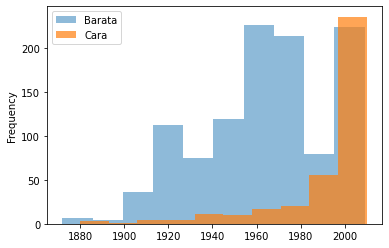

In [ ]:
# Divisão YearBuilt por Categoria

ano_barata = df[df['Categoria'] == 'barata']
ano_cara = df[df['Categoria'] == 'cara']

# Histograma

ano_barata['YearBuilt'].plot(kind='hist', alpha=0.5)
ano_cara['YearBuilt'].plot(kind='hist', alpha=0.7)
plt.legend(["Barata", "Cara"])
plt.show()

In [ ]:
# Porcentagem do número de quartos de acordo com sua frequência

df['perc_quartos'] = df.groupby(by='Categoria')['BedroomAbvGr'].transform(lambda z: z / z.sum() * 100)

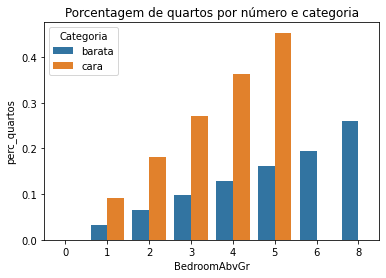

In [ ]:
# Gráfico

sns.barplot(data=df, x='BedroomAbvGr', y='perc_quartos', hue='Categoria')
plt.title('Porcentagem de quartos por número e categoria')
plt.xlabel('')
plt.show()

<Axes: xlabel='BedroomAbvGr', ylabel='count'>

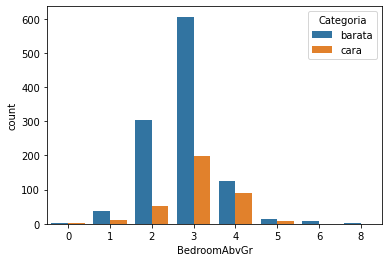

In [ ]:
# Gráfico que de numero de quartos e categoria

sns.countplot(data=df, x='BedroomAbvGr', hue='Categoria')

<Axes: xlabel='OverallCond', ylabel='count'>

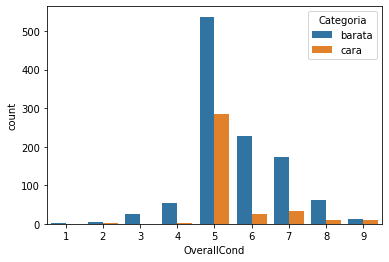

In [ ]:
# Gráfico classificação condição da casa agrupada por categoria

sns.countplot(data=df, x='OverallCond', hue='Categoria')